In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [8]:
mnist = pd.read_csv('mnist_train.csv')
X = mnist.drop('label', axis=1)
y = mnist['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (29369, 784)
Testing data shape: (7343, 784)


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
print("Training GaussianNB...")
gnb = GaussianNB()
gnb.fit(X_train, y_train)

Training GaussianNB...


GaussianNB()

In [11]:
acc = gnb.score(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 57.22%


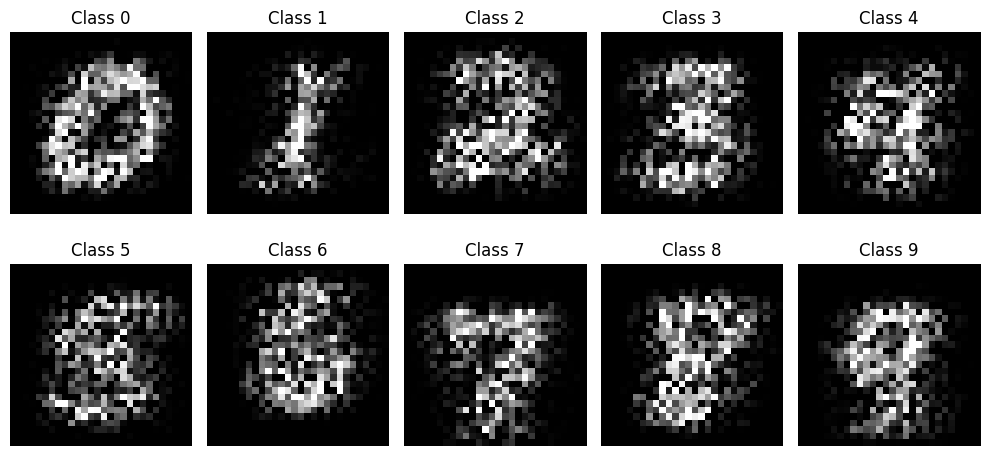

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for digit_class in range(10):
    mean = gnb.theta_[digit_class]
    var = gnb.var_[digit_class]
    sample = np.random.normal(mean, np.sqrt(var))
    sample = np.clip(sample, 0, 1)

    axes[digit_class].imshow(sample.reshape(28, 28), cmap='gray')
    axes[digit_class].set_title(f"Class {digit_class}")
    axes[digit_class].axis('off')
plt.tight_layout()
plt.show()